#**3.1 Text Preprocessing, Tokenization, and Sequence Padding**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Assesments/News Category Dataset/news_category.csv')

# Display first few rows
print(df.head(10))
print("\nDataset shape:", df.shape)

                                            headline        category
0  How A New Documentary Captures The Complexity ...  CULTURE & ARTS
1  Twitch Bans Gambling Sites After Streamer Scam...            TECH
2  'Reboot' Is A Clever And Not Too Navel-Gazey L...  CULTURE & ARTS
3  Maury Wills, Base-Stealing Shortstop For Dodge...          SPORTS
4  Las Vegas Aces Win First WNBA Title, Chelsea G...          SPORTS
5  Meet Alex Aster, The TikToker Changing The Pub...  CULTURE & ARTS
6  TikTok Search Results Riddled With Misinformat...            TECH
7  Boston Marathon To Make Race More Inclusive Fo...          SPORTS
8  Anthony Varvaro, MLB Pitcher Turned Transit Co...          SPORTS
9  How Ani Liu Is Brilliantly Disguising Her Art ...  CULTURE & ARTS

Dataset shape: (11025, 2)


In [ ]:
# reset the environment with compatible versions
!pip uninstall -y numpy tensorflow gensim scipy
!pip install numpy==1.23.5
!pip install tensorflow==2.12.0
!pip install scipy==1.10.1
!pip install gensim==4.2.0

# restart the runtime before proceeding

Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cvxpy 1.6.5 requires scipy>=1.11.0, which is not installed.
jaxlib 0.5.1 requires scipy>=1.11.1, which is not installed.
jax 0.5.2 requires scipy>=1.11.1, which is not installed.
mizani 0.13.5 requires scipy>=1.8.0, which is not installed.
cuml-cu12 25.2.1 requires scipy>=1.8.0, which is not installed.
mlxtend 0.23.4 requires scipy>=1.2.1, which is not installed.
arviz 0.21.0 requires scipy>=1.9.0, which is not installed.
lightgbm 4.5.0 requires scipy, which is not installed.
stumpy 1.13.0 requires scipy>=1.10,

  Using cached tensorflow-2.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.4 kB)
  Using cached gast-0.4.0-py3-none-any.whl.metadata (1.1 kB)
  Using cached keras-2.12.0-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached protobuf-4.25.7-cp37-abi3-manylinux2014_x86_64.whl.metadata (541 bytes)
  Using cached tensorboard-2.12.3-py3-none-any.whl.metadata (1.8 kB)
  Using cached tensorflow_estimator-2.12.0-py2.py3-none-any.whl.metadata (1.3 kB)
  Using cached wrapt-1.14.1-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
  Using cached jax-0.6.0-py3-none-any.whl.metadata (22 kB)
  Using cached jaxlib-0.6.0-cp311-cp311-manylinux2014_x86_64.whl.metadata (1.2 kB)
  Using cached ml_dtypes-0.5.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata

  Using cached tensorflow-2.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.4 kB)
  Using cached scipy-1.15.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached tensorflow-2.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (586.0 MB)
Using cached scipy-1.15.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (37.7 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
orbax-checkpoint 0.11.13 requires jax>=0.5.0, but you have jax 0.4.30 which is incompatible.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.12.0 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.12.0 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.2

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


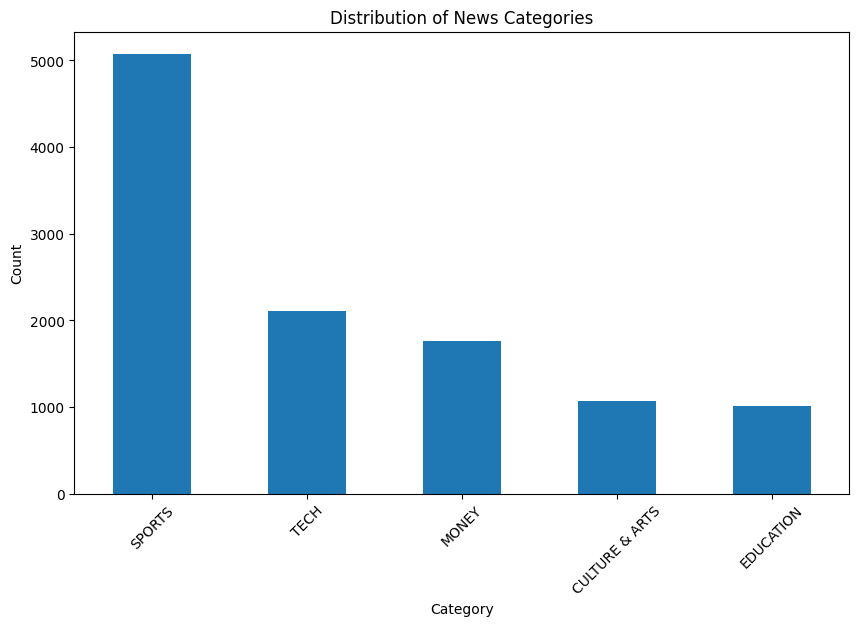

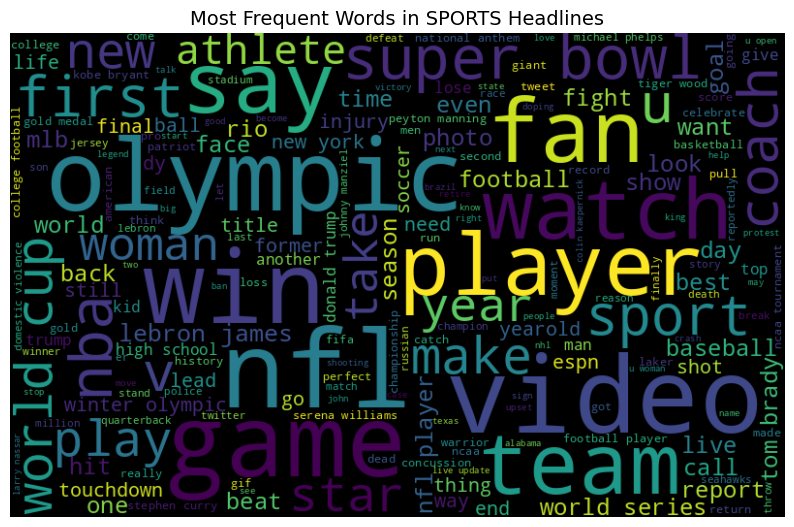

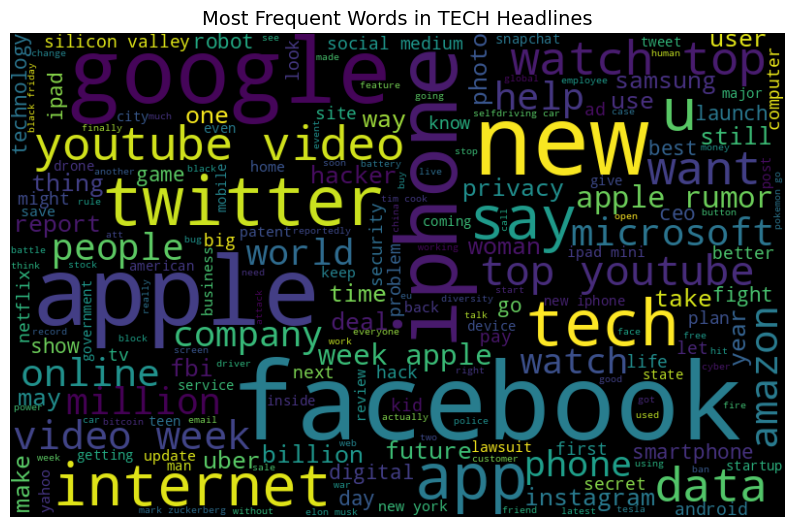

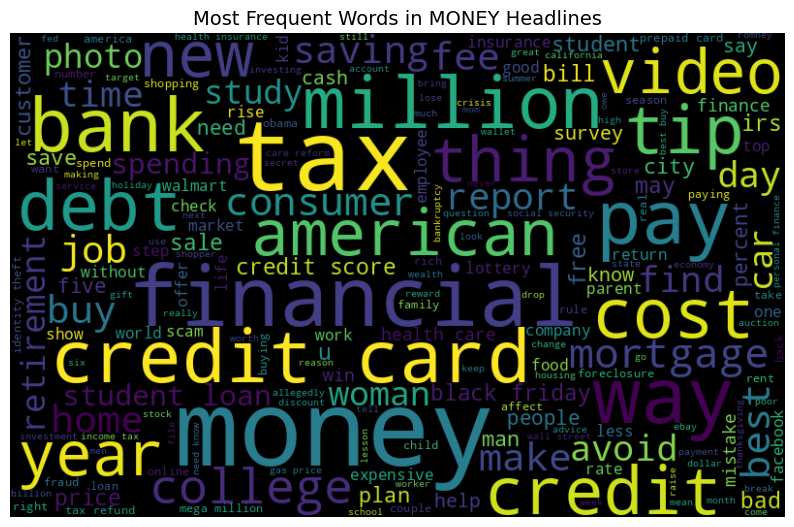


Dataset Statistics:
Total samples: 11025
Vocabulary size: 12375
Maximum sequence length: 10
Number of classes: 5
Class mapping: {'CULTURE & ARTS': 0, 'EDUCATION': 1, 'MONEY': 2, 'SPORTS': 3, 'TECH': 4}


In [ ]:
import nltk
import os
import shutil

# Define custom path
nltk_path = '/root/nltk_data'
nltk.data.path.append(nltk_path)

# Remove corrupted punkt if it exists
punkt_path = os.path.join(nltk_path, 'tokenizers', 'punkt')
if os.path.exists(punkt_path):
    shutil.rmtree(punkt_path)

# Download necessary NLTK resources
nltk.download('punkt', download_dir=nltk_path)
nltk.download('stopwords', download_dir=nltk_path)
nltk.download('wordnet', download_dir=nltk_path)

import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from nltk.tokenize import TreebankWordTokenizer

# Only download necessary NLTK resources
# nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.data.path.append('/root/nltk_data')  # explicitly add path

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/Assesments/News Category Dataset/news_category.csv')

# For your dataset, we'll use 'headline' as text and 'category' as label
text_col = 'headline'
label_col = 'category'

# Text preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

tokenizer = TreebankWordTokenizer()

def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s\']', '', text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)

    tokens = tokenizer.tokenize(text)  # <-- replaced word_tokenize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['cleaned_text'] = df[text_col].apply(preprocess_text)

# Check for and handle any empty strings after preprocessing
df = df[df['cleaned_text'].str.strip().astype(bool)]

# Visualize category distribution
plt.figure(figsize=(10, 6))
df[label_col].value_counts().plot(kind='bar')
plt.title('Distribution of News Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Visualize most frequent words by category (top 3 categories for example)
top_categories = df[label_col].value_counts().nlargest(3).index
for category in top_categories:
    category_text = ' '.join(df[df[label_col] == category]['cleaned_text'])
    if category_text.strip():  # Only generate if text exists
        wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(category_text)
        plt.figure(figsize=(10, 7))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis('off')
        plt.title(f"Most Frequent Words in {category} Headlines", fontsize=14)
        plt.show()

# Encode labels
label_encoder = LabelEncoder()
df['encoded_label'] = label_encoder.fit_transform(df[label_col])

# Tokenization and Padding
X = df['cleaned_text']
y = df['encoded_label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Calculate 95th percentile of sequence lengths for padding
train_lengths = [len(seq) for seq in X_train_seq]
max_len = int(np.percentile(train_lengths, 95))

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

vocab_size = len(tokenizer.word_index) + 1
num_classes = len(label_encoder.classes_)

print("\nDataset Statistics:")
print(f"Total samples: {len(df)}")
print(f"Vocabulary size: {vocab_size}")
print(f"Maximum sequence length: {max_len}")
print(f"Number of classes: {num_classes}")
print("Class mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

NumPy version: 1.23.5
TensorFlow version: 2.12.0

Training Model 1 (Simple RNN)...
Epoch 1/15
111/111 [==============================] - 9s 39ms/step - loss: 0.9926 - accuracy: 0.6222 - val_loss: 0.6484 - val_accuracy: 0.7834
Epoch 2/15
111/111 [==============================] - 3s 29ms/step - loss: 0.3656 - accuracy: 0.8828 - val_loss: 0.5459 - val_accuracy: 0.8175
Epoch 3/15
111/111 [==============================] - 3s 30ms/step - loss: 0.1304 - accuracy: 0.9641 - val_loss: 0.6620 - val_accuracy: 0.8005
Epoch 4/15
111/111 [==============================] - 5s 42ms/step - loss: 0.0676 - accuracy: 0.9836 - val_loss: 0.7436 - val_accuracy: 0.8039
Epoch 5/15
111/111 [==============================] - 3s 31ms/step - loss: 0.0407 - accuracy: 0.9889 - val_loss: 0.7468 - val_accuracy: 0.8073

Training Model 2 (LSTM)...
Epoch 1/15
111/111 [==============================] - 9s 56ms/step - loss: 1.1502 - accuracy: 0.5520 - val_loss: 0.7272 - val_accuracy: 0.7177
Epoch 2/15
111/111 [===========

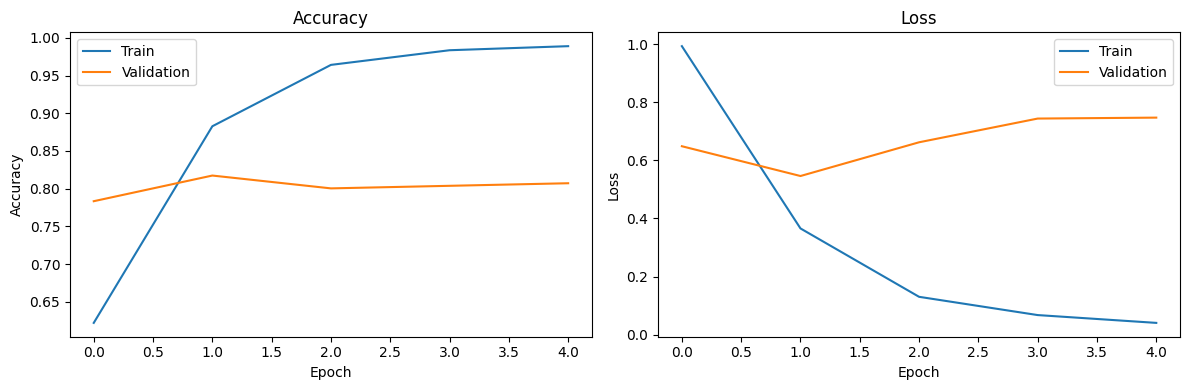


Evaluation for LSTM_with_Embedding
Test Accuracy: 0.8227
Test Loss: 0.5161


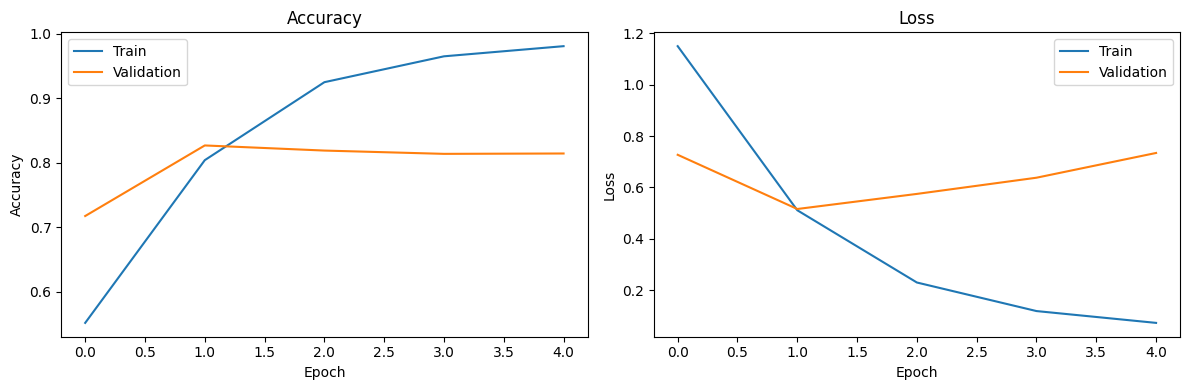


Evaluation for LSTM_with_GloVe
Test Accuracy: 0.8449
Test Loss: 0.4451


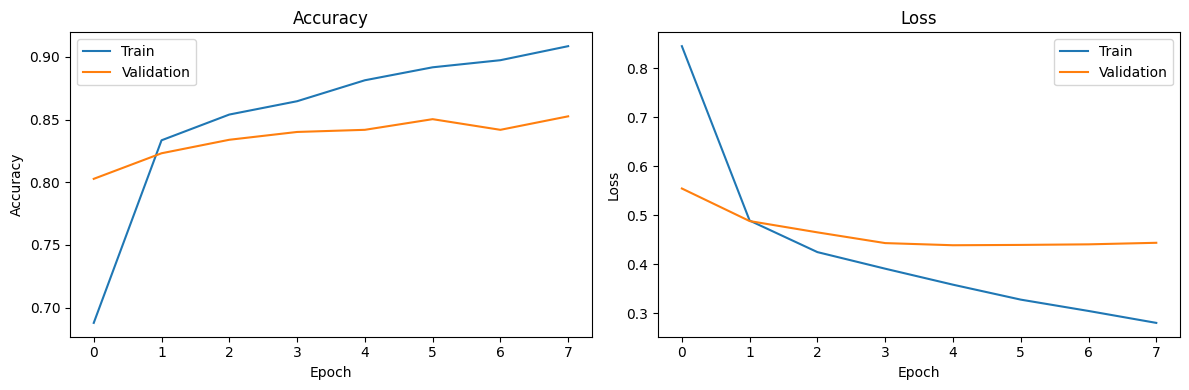

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Verify versions
print("NumPy version:", np.__version__)
print("TensorFlow version:", tf.__version__)

# Load your preprocessed data
# X_train_pad, X_test_pad, y_train, y_test, vocab_size, max_len, num_classes

# Convert labels to one-hot encoding
y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test_onehot = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

# Training configuration
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
batch_size = 64
epochs = 15

# --- Model 1: Simple RNN with trainable Embedding ---
model1 = Sequential(name="SimpleRNN_with_Embedding")
model1.add(Embedding(input_dim=vocab_size,
                   output_dim=128,
                   input_length=max_len))
model1.add(SimpleRNN(64))
model1.add(Dense(num_classes, activation='softmax'))

model1.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

print("\nTraining Model 1 (Simple RNN)...")
history1 = model1.fit(
    X_train_pad, y_train_onehot,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# --- Model 2: LSTM with trainable Embedding ---
model2 = Sequential(name="LSTM_with_Embedding")
model2.add(Embedding(input_dim=vocab_size,
                   output_dim=128,
                   input_length=max_len))
model2.add(LSTM(64))
model2.add(Dense(num_classes, activation='softmax'))

model2.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

print("\nTraining Model 2 (LSTM)...")
history2 = model2.fit(
    X_train_pad, y_train_onehot,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# --- Model 3: Alternative implementation without gensim ---
try:
    # Load pretrained GloVe embeddings (alternative to Word2Vec)
    !wget http://nlp.stanford.edu/data/glove.6B.zip
    !unzip glove.6B.zip

    # Create embedding matrix
    embedding_dim = 100
    embeddings_index = {}
    with open('glove.6B.100d.txt', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs

    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    for word, i in tokenizer.word_index.items():
        if i < vocab_size and word in embeddings_index:
            embedding_matrix[i] = embeddings_index[word]

    model3 = Sequential(name="LSTM_with_GloVe")
    model3.add(Embedding(input_dim=vocab_size,
                       output_dim=embedding_dim,
                       input_length=max_len,
                       weights=[embedding_matrix],
                       trainable=False))
    model3.add(LSTM(64))
    model3.add(Dense(num_classes, activation='softmax'))

    model3.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(learning_rate=0.001),
        metrics=['accuracy']
    )

    print("\nTraining Model 3 (LSTM with GloVe)...")
    history3 = model3.fit(
        X_train_pad, y_train_onehot,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.2,
        callbacks=[early_stop],
        verbose=1
    )
    pretrained_success = True
except Exception as e:
    print(f"\nFailed to load pretrained embeddings: {e}")
    print("Proceeding without Model 3")
    pretrained_success = False

# Evaluation function
def evaluate_model(model, history, X_test, y_test):
    print(f"\nEvaluation for {model.name}")
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Test Loss: {loss:.4f}")

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Evaluate all models
evaluate_model(model1, history1, X_test_pad, y_test_onehot)
evaluate_model(model2, history2, X_test_pad, y_test_onehot)
if pretrained_success:
    evaluate_model(model3, history3, X_test_pad, y_test_onehot)

# Save models
model1.save('simple_rnn_model.h5')
model2.save('lstm_model.h5')
if pretrained_success:
    model3.save('lstm_glove_model.h5')

69/69 [==============================] - 0s 3ms/step

Evaluation for SimpleRNN_with_Embedding
Test Accuracy: 0.8240
Test Loss: 0.5359


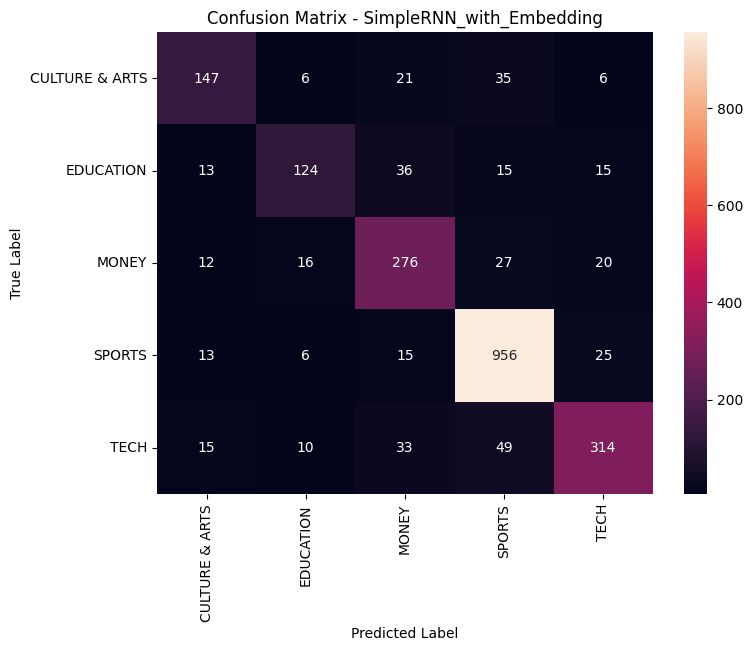


Classification Report:
                precision    recall  f1-score   support

CULTURE & ARTS       0.73      0.68      0.71       215
     EDUCATION       0.77      0.61      0.68       203
         MONEY       0.72      0.79      0.75       351
        SPORTS       0.88      0.94      0.91      1015
          TECH       0.83      0.75      0.78       421

      accuracy                           0.82      2205
     macro avg       0.79      0.75      0.77      2205
  weighted avg       0.82      0.82      0.82      2205

69/69 [==============================] - 1s 4ms/step

Evaluation for LSTM_with_Embedding
Test Accuracy: 0.8227
Test Loss: 0.5161


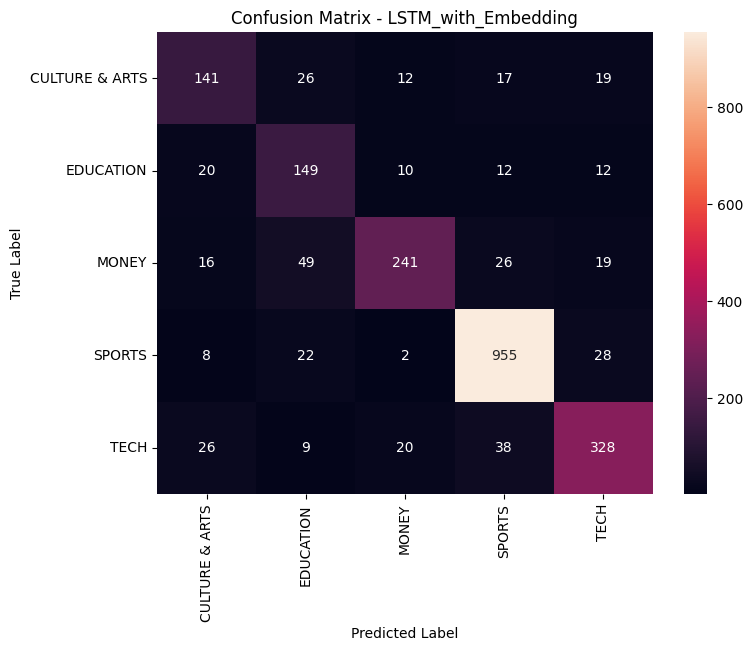


Classification Report:
                precision    recall  f1-score   support

CULTURE & ARTS       0.67      0.66      0.66       215
     EDUCATION       0.58      0.73      0.65       203
         MONEY       0.85      0.69      0.76       351
        SPORTS       0.91      0.94      0.93      1015
          TECH       0.81      0.78      0.79       421

      accuracy                           0.82      2205
     macro avg       0.76      0.76      0.76      2205
  weighted avg       0.83      0.82      0.82      2205

69/69 [==============================] - 1s 4ms/step

Evaluation for LSTM_with_GloVe
Test Accuracy: 0.8449
Test Loss: 0.4451


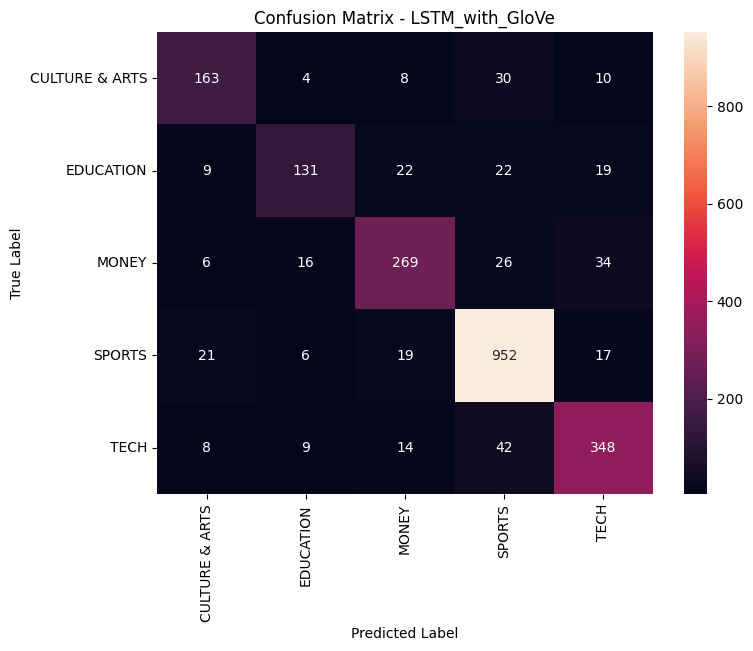


Classification Report:
                precision    recall  f1-score   support

CULTURE & ARTS       0.79      0.76      0.77       215
     EDUCATION       0.79      0.65      0.71       203
         MONEY       0.81      0.77      0.79       351
        SPORTS       0.89      0.94      0.91      1015
          TECH       0.81      0.83      0.82       421

      accuracy                           0.84      2205
     macro avg       0.82      0.79      0.80      2205
  weighted avg       0.84      0.84      0.84      2205


Model Comparison:
                      Model  Test Accuracy  Test Loss  Best Epoch  \
0  SimpleRNN_with_Embedding       0.824036   0.535850           2   
1       LSTM_with_Embedding       0.822676   0.516070           2   
2           LSTM_with_GloVe       0.844898   0.445053           8   

   Val Accuracy  
0      0.817460  
1      0.827098  
2      0.852608  


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

def evaluate_model(model, X_test, y_test, history, label_encoder):
    # Get predictions
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Accuracy and Loss
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"\nEvaluation for {model.name}")
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Test Loss: {loss:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title(f'Confusion Matrix - {model.name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred_classes,
                               target_names=label_encoder.classes_))

# Evaluate all models
evaluate_model(model1, X_test_pad, y_test_onehot, history1, label_encoder)
evaluate_model(model2, X_test_pad, y_test_onehot, history2, label_encoder)
evaluate_model(model3, X_test_pad, y_test_onehot, history3, label_encoder)

# Compare model performances
def compare_models(models, histories, X_test, y_test):
    results = []
    for model, history in zip(models, histories):
        loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
        best_epoch = np.argmax(history.history['val_accuracy']) + 1
        results.append({
            'Model': model.name,
            'Test Accuracy': accuracy,
            'Test Loss': loss,
            'Best Epoch': best_epoch,
            'Val Accuracy': np.max(history.history['val_accuracy'])
        })

    return pd.DataFrame(results)

# Create comparison table
model_df = compare_models([model1, model2, model3],
                             [history1, history2, history3],
                             X_test_pad, y_test_onehot)


print("\nModel Comparison:")
print(model_df)

In [ ]:
!pip install Gradio
import gradio as gr
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model

# Load trained models
model1 = tf.keras.models.load_model('simple_rnn_model.h5')
model2 = tf.keras.models.load_model('lstm_model.h5')
model3 = tf.keras.models.load_model('lstm_glove_model.h5') if pretrained_success else None

# Define class labels (make sure this matches your label encoding)
class_labels = ['CULTURE & ARTS', 'TECH', 'SPORTS']  # Replace with your actual classes

# Prediction function
def predict_category(text, model_choice):
    # Preprocess the input text
    cleaned_text = preprocess_text(text)

    # Convert to sequence and pad
    seq = tokenizer.texts_to_sequences([cleaned_text])
    padded_seq = pad_sequences(seq, maxlen=max_len, padding='post')

    # Select model
    if model_choice == "Simple RNN":
        model = model1
    elif model_choice == "LSTM":
        model = model2
    else:
        if model3 is not None:
            model = model3
        else:
            return "GloVe model not available."

    # Make prediction
    prediction = model.predict(padded_seq)[0]
    top_idx = np.argmax(prediction)
    category = class_labels[top_idx]
    confidence = prediction[top_idx]

    return f"Predicted Category: {category} (Confidence: {confidence:.2f})"

# Gradio interface
iface = gr.Interface(
    fn=predict_category,
    inputs=[
        gr.Textbox(label="Enter news headline:"),
        gr.Radio(["Simple RNN", "LSTM", "LSTM with GloVe"], label="Select Model")
    ],
    outputs="text",
    title="News Headline Category Classifier",
    description="Classify a news headline into a category using different deep learning models."
)

iface.launch()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 76.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.7 MB/s eta 0:00:00
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://5c085718942be5b62c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory 